In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#make plot bigger
sns.set(rc={'figure.figsize': (9, 6)})

In [4]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')

## В этом модуле, мы продолжаем разбираться с задачей, начнем исследовать данные
Описание данных:

events_train.csv - данные о действиях, которые совершают студенты со стэпами

step_id - id стэпа user_id - анонимизированный id юзера timestamp - время наступления события в формате unix date action - событие, возможные значения: discovered - пользователь перешел на стэп viewed - просмотр шага, started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага passed - удачное решение практического шага submissions_train.csv - данные о времени и статусах сабмитов к практическим заданиям

step_id - id стэпа timestamp - время отправки решения в формате unix date submission_status - статус решения user_id - анонимизированный id юзера

In [5]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',compression ='zip')

In [6]:
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [7]:
# check for unique action data / проверяем уникальные данные
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [8]:
# drop column / удалим колонку
events_data.drop(events_data.columns[4],axis=1,inplace=True)

IndexError: index 4 is out of bounds for axis 0 with size 4

In [24]:
# create a new column, convert the data to date format / создаем новую колонку, преобразуем данные в формат даты
events_data['date']=pd.to_datetime(events_data.timestamp, unit='s')

In [80]:
submissions_data['date']=pd.to_datetime(submissions_data.timestamp, unit='s')

In [25]:
events_data.head(10)

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
5,32811,1434340895,passed,17632,2015-06-15 04:01:35
6,32929,1434340921,discovered,17632,2015-06-15 04:02:01
7,32929,1434340921,viewed,17632,2015-06-15 04:02:01
8,32929,1434340939,started_attempt,17632,2015-06-15 04:02:19
9,32929,1434340944,passed,17632,2015-06-15 04:02:24


In [81]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03


In [26]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [27]:
# check min/ max data / проверяем макс или мин дату
events_data.agg({'date': ['max', 'min']})

,date
max,2018-05-19 23:33:31
min,2015-06-15 04:00:48


In [29]:
pd.Timestamp.now()

Timestamp('2021-04-05 04:07:15.030649')

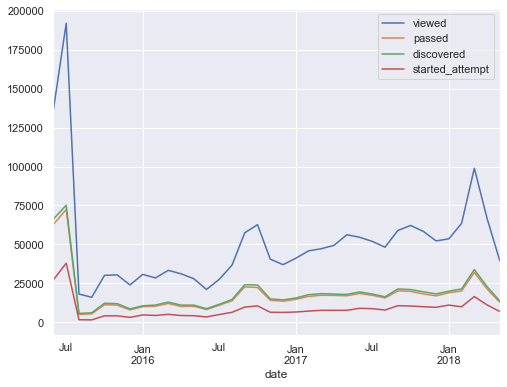

In [34]:
#построим график 
plot_events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')
plot_events_data['date'] = pd.to_datetime(plot_events_data.timestamp, unit = 's')
plot_events_data.index = plot_events_data['date']

pas = plot_events_data[plot_events_data['action'] == 'passed']['action'].resample('M').count()
vie = plot_events_data[plot_events_data['action'] == 'viewed']['action'].resample('M').count()
dis = plot_events_data[plot_events_data['action'] == 'discovered']['action'].resample('M').count()
star = plot_events_data[plot_events_data['action'] == 'started_attempt']['action'].resample('M').count()

for column in [vie, pas, dis, star]:
    column.plot(figsize=(8, 6), legend = True)
    plt.legend(['viewed', 'passed', 'discovered', 'started_attempt'])

In [35]:
#добавляем колонку day
events_data['day'] = events_data.date.dt.date

In [85]:
#добавляем колонку day
submissions_data['day'] = submissions_data.date.dt.date

In [36]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [86]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [43]:
# выборка 
events_data.groupby('day').user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

<AxesSubplot:xlabel='day'>

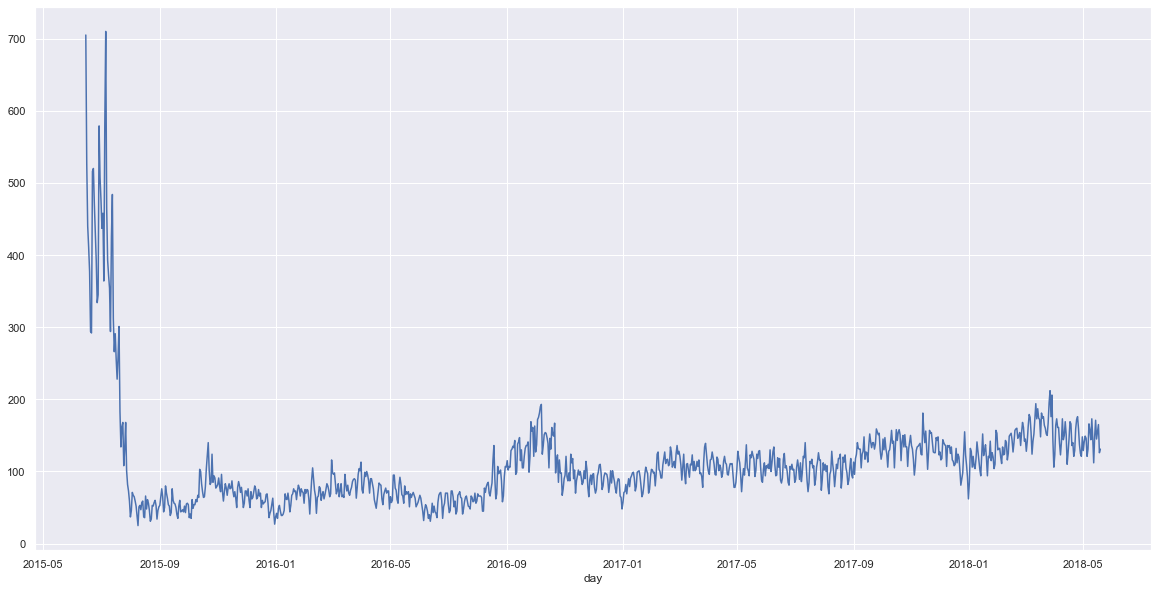

In [46]:
#рисуем график распределения активных пользователей по дням
events_data.groupby('day').user_id.nunique().plot(figsize=(20,10))

In [47]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [61]:
events_data[events_data['action']=='passed']

,step_id,timestamp,action,user_id,date,day
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15
12,32814,1434340950,passed,17632,2015-06-15 04:02:30,2015-06-15
16,32812,1434341039,passed,17632,2015-06-15 04:03:59,2015-06-15
...,...,...,...,...,...,...
3480679,32179,1526771246,passed,19410,2018-05-19 23:07:26,2018-05-19
3480680,32182,1526771250,passed,19410,2018-05-19 23:07:30,2018-05-19
3480692,33373,1526772469,passed,11677,2018-05-19 23:27:49,2018-05-19
3480696,33375,1526772685,passed,11677,2018-05-19 23:31:25,2018-05-19


<AxesSubplot:>

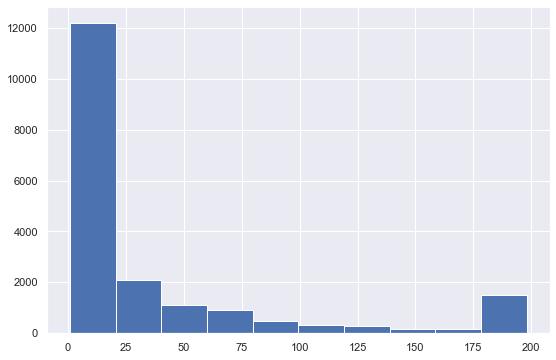

In [78]:
#пользователи которые прошли курс 
# По оси у - кол-во сдавших, по оси х - кол-во решенных степов. Т.е. пользователей, которые решили 200 степов, где-то 2тыс

events_data[events_data['action']=='discovered']\
    .groupby(['user_id'], as_index=False)\
    .agg({'step_id': 'count'})\
    .rename(columns={'step_id':'passed_steps'}).passed_steps.hist()

<AxesSubplot:>

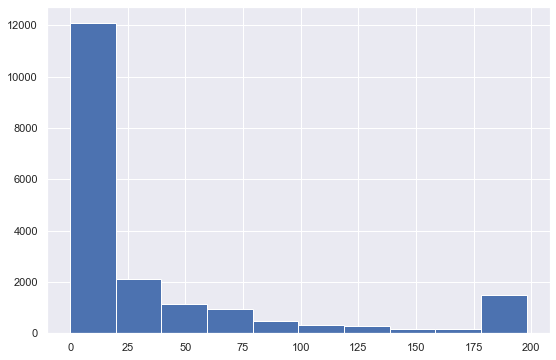

In [77]:
#Мы потеряли часть данных, можно исправить pivot таблицей:
events_data.pivot_table(index='user_id', #в результате каждая строчка будет информацией о каждом уникальном index
               columns='action', #столбцы будут отвечать за уникальные значения action 
               values='step_id', #в ячейках будет находиться информация по values
               aggfunc='count', #сгруппированная по aggfunc
               fill_value=0 #fill_value - если у человека нету степа, заполняет значение нулем.
).reset_index().discovered.hist()

In [88]:
#создаем pivot для submissions_data
users_scores = submissions_data.pivot_table(index='user_id', #в результате каждая строчка будет информацией о каждом уникальном index
               columns='submission_status', #столбцы будут отвечать за уникальные значения action 
               values='step_id', #в ячейках будет находиться информация по values
               aggfunc='count', #сгруппированная по aggfunc
               fill_value=0 #fill_value - если у человека нету степа, заполняет значение нулем.
).reset_index()

In [89]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [107]:
 # выводит в лист все таймстемпы, считаем дельту разницы между двумя заходами на степы
gap_data= events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values

In [112]:
# объеденяем все в серию пандас 
gap_data= pd.Series(np.concatenate(gap_data, axis=0))

In [116]:
#дельта дней сколько прошло у пользователя между двумя заходами на степы
gap_data=gap_data /(24*60*60)

<AxesSubplot:>

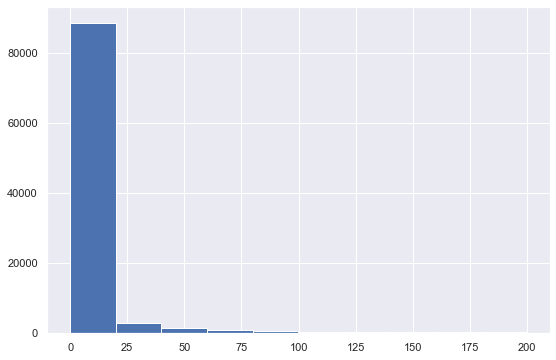

In [118]:
gap_data[gap_data<200].hist()

только 5% возвращается спустя 2 месяца

In [128]:
gap_data.quantile(0.95)

59.760440972222156

90 процентов пользователей возвращаются на курсе после 18 дней. Мы возбьмем 30 дней 
90% возвращается спустя 18 дней, 10% более чем через 18 дней

In [127]:
gap_data.quantile(0.90)

18.325995370370403

## Введите id Анатолия Карпова, под которым он фигурирует в данных events_data_train и submissions_data_train.

In [130]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [147]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [189]:
#Выбираем и сортируем пользователя по максимально правильным correct submission_status
submissions_data[['user_id','submission_status']]\
    .loc[submissions_data['submission_status']=='correct']\
    .groupby('user_id', as_index=False)\
    .agg({'submission_status':'count'})\
    .sort_values('submission_status', ascending=False)

,user_id,submission_status
433,1046,421
2062,5552,186
6323,17135,168
2302,6183,142
3151,8461,135
...,...,...
2305,6191,1
2303,6184,1
2299,6166,1
5813,15771,1


## дополнительный вариант

In [195]:
events_data.groupby('user_id', as_index=False)\
    .agg({'day': ['count','nunique','min','max'],
          'timestamp' : ['count','nunique','min','max'],
          'action' : ['count']})\
    .sort_values(('action','count'), ascending=False).head(15)

user_id    day                                 timestamp          \
               count nunique         min         max     count nunique   
15007   20907  33043     221  2015-06-15  2016-01-22     33043   32764   
7780    10794  16436     281  2016-08-02  2017-07-27     16436   16089   
18150   25279  10179      75  2017-06-05  2017-08-18     10179    9777   
781      1046   9095     478  2015-06-15  2018-05-01      9095    8834   
2611     3572   7905     236  2017-07-13  2018-05-19      7905    7245   
8470    11770   6641      57  2016-04-05  2016-05-31      6641    6330   
6879     9546   6387     108  2017-12-10  2018-03-27      6387    6017   
553       761   4592      43  2016-02-23  2016-04-05      4592    4281   
6043     8363   3918      48  2017-10-24  2017-12-10      3918    3557   
9792    13602   3480      62  2015-11-22  2017-07-07      3480    3076   
4904     6764   3271      33  2016-01-22  2016-02-23      3271    2960   
14002   19472   3051      73  2016-05-31  2016-08-16      3051    2738   
806      1078   2912     164  2015-06-15  2018-02-12      2912    2527   
19136   26654   2869      44  2017-09-11  2017-10-24      2869    2514   
3839     5301   2848      44  2015-06-15  2016-09-12      2848    2498   

                              action  
              min         max  count  
15007  1434346645  1453480839  33043  
7780   1470098674  1501136015  16436  
18150  1496638821  1503065555  10179  
781    1434351519  1525160857   9095  
2611   1499937688  1526732794   7905  
8470   1459849887  1464693892   6641  
6879   1512892117  1522143783   6387  
553    1456253995  1459848744   4592  
6043   1508812467  1512887644   3918  
9792   1448222271  1499469001   3480  
4904   1453482238  1456246651   3271  
14002  1464694527  1471315533   3051  
806    1434356210  1518438961   2912  
19136  1505142680  1508810298   2869  
3839   1434367179  1473702846   2848

# продолжение работы

In [196]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


если пользователь не посещал курсы 1 месяц будет считать его дропнувшимю Создадим treshold

In [206]:
30*24*60*60

2592000

возьмем последний таймстемп из датасета как настоящий (now)

In [217]:
drop_out_threshold=30*24*60*60
now=events_data.timestamp.max()

In [211]:
user_data=events_data.groupby(['user_id'], as_index = False)\
    .agg({'timestamp': 'max'})\
    .rename(columns={'timestamp':'last_timestamp'})

In [212]:
user_data

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


введем колонку которая рассчитаем нам больше ли чем месяц отсутствовал пользователь 

In [218]:
user_data['is_gone_user']=(now - user_data.last_timestamp)>drop_out_threshold

In [219]:
user_data

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


создаем таблицы и мерджим другую

In [225]:
users_data=user_data.merge(users_scores, on='user_id', how='left')

In [226]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,NaN,NaN
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


FILLNA/ заполняем пропуски нулями

In [227]:
users_data.fillna(0)

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [228]:
user_events_data=events_data.pivot_table(index='user_id', #в результате каждая строчка будет информацией о каждом уникальном index
               columns='action', #столбцы будут отвечать за уникальные значения action 
               values='step_id', #в ячейках будет находиться информация по values
               aggfunc='count', #сгруппированная по aggfunc
               fill_value=0 #fill_value - если у человека нету степа, заполняет значение нулем.
).reset_index()

In [229]:
user_events_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


Объединяем таблицы/ Merge tables

In [239]:
users_data = users_data.merge(user_events_data, on='user_id', how='left')

In [240]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,NaN,NaN,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,NaN,NaN,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,NaN,NaN,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [237]:
users_data.drop(['discovered_x','passed_x','started_attempt_x','viewed_x','discovered_y','passed_y','started_attempt_y','viewed_y'], axis=1, inplace=True)

In [241]:
events_data.groupby('user_id').day.nunique().to_frame().reset_index()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [243]:
user_day=events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [244]:
users_data.merge(user_day, on='user_id', how='left')

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,NaN,NaN,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,NaN,NaN,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,NaN,NaN,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [245]:
users_data=users_data.merge(user_day, on='user_id', how='left')

In [246]:
users_data.user_id.nunique()

19234

In [247]:
events_data.user_id.nunique()

19234

In [248]:
#если сдал больше 170 степиков то сдал курс
users_data['passed_course']=users_data.passed >170

In [249]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,NaN,NaN,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,NaN,NaN,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,NaN,NaN,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [251]:
users_data.dtypes

user_id              int64
last_timestamp       int64
is_gone_user          bool
correct            float64
wrong              float64
discovered           int64
passed               int64
started_attempt      int64
viewed               int64
day                  int64
passed_course         bool
dtype: object

In [254]:
users_data.fillna(0, inplace = True)

In [255]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False
